In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("/Users\AMER\OneDrive\Desktop\machine/mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [ ]:
M = data[data.diagnosis=="M"]
B = data[data.diagnosis=="B"]

In [ ]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="malignant") 
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="benign")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [9]:
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis] 

In [10]:
y = data.diagnosis.values 

In [11]:
x_data= data.iloc[:,1:3].values 

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size=0.3,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)

In [15]:
from sklearn.tree import DecisionTreeClassifier
tree_classification=DecisionTreeClassifier(random_state=1,criterion='entropy')
tree_classification.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [16]:
y_head=tree_classification.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_head)
accuracy

0.847953216374269

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_head)

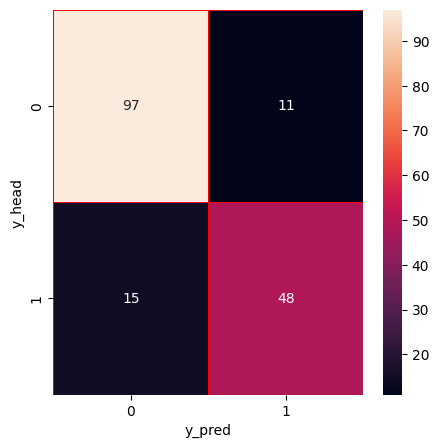

In [20]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_head")
plt.show()